# Notebook 7 - Natural Language Processing (NLP)

CSI4106 Artificial Intelligence  
Fall 2021. \
Version 1 (2020) prepared by Julian Templeton and Caroline Barrière.  Version 2 (2021) modified by Caroline Barrière.

***INTRODUCTION***:  

Covid-19 has shifted our day-to-day lives and has impacted the world globally. Much of what is going on in the world is brought to us through the news, in the form of text.  

In this notebook, we will be performing Natural Language Processing (NLP) techniques on a dataset of Covid-19 related news. A set of texts is often referred to as *corpus*, so we will use this term *corpus* in the rest of this notebook to refer to the entire dataset of texts. 

We will be doing tokenization, lemmatization, Part-of-speech (POS) tagging, stopword removal, and more to individual sentences from news articles (Part 1 of Notebook), and the entire corpus (Part 2 of Notebook). You will be using the NLP library [spaCy](https://spacy.io/) to perform these NLP techniques. This library makes it simple to perform these complex operations for text in a specified language.    

This will allow you to explore the NLP Pipeline and analyze the contents of the text within the corpus. You will also be creating word clouds based on the modified text from the corpus. This will allow us to visualize the key words from the articles to better understand which content is most important in them.     

During the lectures, we have also looked at *Named Entity Recognition*.  This will not be explored in this notebook but rather in the next one.

For this notebook you will need to install the following packages in addition to libraries previously used:     
1) [spaCy](https://spacy.io/usage): pip install -U spacy      
2) spaCy's English package (change the command according to your environment, ex: python vs py): py -m spacy download en          
3) [WordCloud](https://amueller.github.io/word_cloud/): pip install wordcloud      
4) MultiDict: pip install multidict     

**Note:** In the code below, some options will be provided for installation if you work on colab (where this notebook was tested).

***HOMEWORK***:  \

Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, sign the notebook (at the end of the notebook), modify its name to StudentNumber-LastName-Notebook7.ipynb and submit it.  

*The notebook will be marked on 25.  
Each **(TO DO)** has a number of points associated with it.*
***

In [2]:
# Already installed on colab, you might need to install it locally
!pip install -U spacy

In [3]:
# Already installed on colab, you might need to install it locally
!pip install wordcloud

In [4]:
# NOT installed on colab, should be installed
!pip install multidict

In [2]:
# Before starting we will import every module that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import multidict as multidict
import spacy
from spacy import displacy
from wordcloud import WordCloud

In [3]:
# The core spacy object that will be used for tokenization, lemmatization, POS Tagging, ...
# Note that this is specifically for the English language and requires the English package to be installed
# via pip to work as intended.

# sp = spacy.load('en')

# If the above causes an error after installing the package described in the introduction (point 2), 
# then install the package as below
#!spacy download en_core_web_sm
sp = spacy.load('en_core_web_sm')

**PART 1 - Sentence Analysis**  
  
In this part, we will use the modules from *spaCy* to perform the different steps of the NLP pipeline on individual sentences from the included file of Covid-19 related news articles from CBC news. The corpus (news.csv) is available through Brightspace, but details regarding it can be found [here](https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26?select=news.csv). 

The first thing that we will do is load the file into a pandas dataframe, and take a look at its content.

In [4]:
# Read the dataset, show top rows
df = pd.read_csv("news.csv")
df.head(20)

Unnamed: 0                                            authors  \
0           0                                                 []   
1           1                                                 []   
2           2                             ['The Canadian Press']   
3           3                                                 []   
4           4                                                 []   
5           5  ['Senior Writer', 'Chris Arsenault Is A Senior...   
6           6                                       ['Cbc News']   
7           7                                       ['Cbc News']   
8           8  ['Senior Writer', "Adam Miller Is Senior Digit...   
9           9                                ['Thomson Reuters']   
10         10                                       ['Cbc News']   
11         11                                ['Thomson Reuters']   
12         12                           ['The Associated Press']   
13         13                                ['Thomson Reuters']   
14         14                                       ['Cbc News']   
15         15                                                 []   
16         16  ['Video Journalist', "Colin Butler Is A Vetera...   
17         17                                ['Thomson Reuters']   
18         18                                       ['Cbc News']   
19         19                                ['Thomson Reuters']   

                                                title      publish_date  \
0   'More vital now:' Gay-straight alliances go vi...   2020-05-03 1:30   
1   Scientists aim to 'see' invisible transmission...   2020-05-02 8:00   
2   Coronavirus: What's happening in Canada and ar...  2020-05-02 11:28   
3   B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
4   B.C. announces 26 new coronavirus cases, new c...  2020-05-02 18:45   
5   Brazil has the most confirmed COVID-19 cases i...   2020-05-02 8:00   
6    The latest on the coronavirus outbreak for May 1  2020-05-01 20:43   
7   Coronavirus: What's happening in Canada and ar...  2020-05-01 11:51   
8   Did the WHO mishandle the global coronavirus p...   2020-04-30 8:00   
9   Armed people in Michigan's legislature protest...  2020-04-30 21:37   
10  The latest on the coronavirus outbreak for Apr...  2020-04-30 21:05   
11  Brazil using mass graves in Amazon region as c...  2020-04-30 12:11   
12  Coronavirus 'not manmade or genetically modifi...  2020-04-30 16:47   
13  Coronavirus will trigger biggest ever plunge i...  2020-04-30 13:47   
14  Coronavirus: What's happening in Canada and ar...  2020-04-30 11:40   
15  Her greatest fear was dying alone — two days a...  2020-04-30 11:00   
16  COVID-19's strain brought these London chariti...   2020-04-30 9:00   
17  China angered by Australian call for internati...  2020-04-29 14:06   
18  The latest on the coronavirus outbreak for Apr...  2020-04-29 20:44   
19  Beloved British WWII vet who raised millions f...  2020-04-30 11:05   

                                          description  \
0   Lily Overacker and Laurell Pallot start each g...   
1   Some researchers aim to learn more about how t...   
2   Canada's chief public health officer struck an...   
3   B.C. provincial health officer Dr. Bonnie Henr...   
4   B.C. provincial health officer Dr. Bonnie Henr...   
5   From describing coronavirus as a "little flu,"...   
6   The latest on the coronavirus outbreak from CB...   
7   Nova Scotia announced Friday it is immediately...   
8   The World Health Organization has come under f...   
9   Hundreds of protesters, some armed, gathered a...   
10  The latest on the coronavirus outbreak from CB...   
11  Deaths from the coronavirus outbreak have pile...   
12  U.S. intelligence agencies said Thursday they ...   
13  Economic lockdowns brought on by the coronavir...   
14  Alberta becomes the latest province to unveil ...   
15  The 65-year-old should have spent her last day...   
16  The strain of coronavirus

First, we will display the text of an article and will manually copy five sentences that will be used for this part of the notebook. Notice that there are many tags saved within the dataset, but we will not worry about those for now.

In [4]:
df["text"][1]

'This is an excerpt from\xa0Second Opinion, a\xa0weekly\xa0roundup of eclectic and under-the-radar health and medical science news emailed to subscribers every Saturday morning.\xa0If you haven\'t subscribed yet, you can do that by\xa0clicking here.  The coronavirus that causes COVID-19 spreads through droplets that we spew as we breathe, talk, cough and sneeze —\xa0so tiny that they\'re invisible to the naked eye.\xa0 That\'s why\xa0questions remain about the virus\'s transmission and what precautions need to be taken to curb its spread as governments begin to lift restrictions. Will it help if everyone wears a mask? Is keeping everyone two metres apart far enough? Some researchers aim to learn more about transmission by trying to make invisible sneezes, coughs and breaths more visible. Here\'s a closer look at that research and what it might reveal. How do scientists think COVID-19 is transmitted? According to the World Health Organization, the disease spreads primarily through tiny 

From this text, we will select one sentence that will be used by the examples provided within the notebook, *sentence_example*, and five sentences that you will be using to answer five questions within this section, *sentence1*, ... *sentence5*. Sentences 4 and 5 are the same due to that sentence being great for both of the questions.

In [5]:
# Sentence to be used for running examples
sentence_example = "Government guidelines in Canada recommend that people stay at least two metres away from others as part of physical distancing measures to curb the spread of COVID-19."
# Sentences to be used for future questions
sentence1 = "I think those are provocative and those are hypothesis-generating, but then they need to be tested in the field.\" Loeb is running such a field test himself — a randomized controlled trial of the use of medical versus N95 masks among health care workers to see if there is a difference in the transmission of COVID-19."
sentence2 = "The World Health Organization recommends that people wear masks if they are coughing and sneezing or if they are caring for someone who is sick."
sentence3 = "Will it help if everyone wears a mask?"
sentence4 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."
sentence5 = "Infection control guidelines do recommend extra personal protective equipment (including N-95 respirators) to protect against airborne transmission for healthcare workers performing procedures that generate high concentrations of aerosolized particles, such as intubations, on COVID-19 patients, McGeer said."

With the sentences that we will be using defined, we will now explore how spaCy can be applied on a sentence to perform different processes. 

First, we will pass the example sentence into our spacy object *sp* to retrieve the tokenization, lemmatization, dependency values, Part-of-speech (POS) tags, and more from the sentence. As you will see, spaCy makes this process very easy.

In [6]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)

Text: Government Lemma: government POS: NOUN Dependency: compound
Text: guidelines Lemma: guideline POS: NOUN Dependency: nsubj
Text: in Lemma: in POS: ADP Dependency: prep
Text: Canada Lemma: Canada POS: PROPN Dependency: pobj
Text: recommend Lemma: recommend POS: VERB Dependency: ROOT
Text: that Lemma: that POS: SCONJ Dependency: mark
Text: people Lemma: people POS: NOUN Dependency: nsubj
Text: stay Lemma: stay POS: VERB Dependency: ccomp
Text: at Lemma: at POS: ADV Dependency: advmod
Text: least Lemma: least POS: ADV Dependency: advmod
Text: two Lemma: two POS: NUM Dependency: nummod
Text: metres Lemma: metre POS: NOUN Dependency: npadvmod
Text: away Lemma: away POS: ADV Dependency: advmod
Text: from Lemma: from POS: ADP Dependency: prep
Text: others Lemma: other POS: NOUN Dependency: pobj
Text: as Lemma: as POS: ADP Dependency: prep
Text: part Lemma: part POS: NOUN Dependency: pobj
Text: of Lemma: of POS: ADP Dependency: prep
Text: physical Lemma: physical POS: ADJ Dependency: amod

In [7]:
# We will take a look at the dependency tree to view how the words relate to each other
displacy.render(sentence_example_content, style='dep', jupyter=True, options={'distance': 120})

In the code above, we see that we are able to access the tags from the dependency tree for each token by calling *.dep_*. However, we can also directly access elements from the dependency tree (as seen in the code below). For more examples regarding how to navigate through the dependency trees, you can take a look at [some official spaCy examples](https://spacy.io/usage/linguistic-features#dependency-parse). However, below are details that are sufficient to do this notebook.    

Looking at the dependency tree above, we see that the words have arrows to represent the relationships. Each of these have a dependency label to explain the dependencies between tokens. For example, 'Government' is tagged with a *compound* dependency of the noun 'guidelines'. Thus, 'Government guidelines' is a noun compound.    

In the code, after parsing text with spaCy into tokens, it is possible to access the words which a token has arrows connected to (its dependents, also referred to as its children). This is exhibited in the code below.      

Note that when accessing a child node, you are able to access the properties in the same way that you would for a regular spaCy token (.pos_, ...).

In [8]:
# Display how to access the dependency children within a dependency tree
for token in sentence_example_content:
    print("Current token: " + token.text)
    print("All children of this token:", list(token.children))
    print("Left children of this token:", list(token.lefts))
    print("Right children of this token:", list(token.rights))
    print()

Current token: Government
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: guidelines
All children of this token: [Government, in]
Left children of this token: [Government]
Right children of this token: [in]

Current token: in
All children of this token: [Canada]
Left children of this token: []
Right children of this token: [Canada]

Current token: Canada
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: recommend
All children of this token: [guidelines, stay, .]
Left children of this token: [guidelines]
Right children of this token: [stay, .]

Current token: that
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: people
All children of this token: []
Left children of this token: []
Right children of this token: []

Current token: stay
All children of this token: [that, people, away, as, curb]
Left chil

**(TO DO) Q1(a) - 1 mark**  
For *sentence1*, use spaCy to run the sentence through the NLP Pipeline to determine how many tokens are in the sentence. Show all the tokens in *sentence1*.


In [5]:
# ANSWER Q1(a)
# Show tokens and print how many tokens
doc = df["text"][1]
doc_content = sp(doc)
for token in doc_content:
    print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)


Text: This Lemma: this POS: PRON Dependency: nsubj
Text: is Lemma: be POS: AUX Dependency: ROOT
Text: an Lemma: an POS: DET Dependency: det
Text: excerpt Lemma: excerpt POS: NOUN Dependency: attr
Text: from Lemma: from POS: ADP Dependency: prep
Text:   Lemma:   POS: SPACE Dependency: dep
Text: Second Lemma: Second POS: PROPN Dependency: compound
Text: Opinion Lemma: Opinion POS: PROPN Dependency: pobj
Text: , Lemma: , POS: PUNCT Dependency: punct
Text: a Lemma: a POS: DET Dependency: det
Text:   Lemma:   POS: SPACE Dependency: dep
Text: weekly Lemma: weekly POS: ADJ Dependency: amod
Text:   Lemma:   POS: SPACE Dependency: dep
Text: roundup Lemma: roundup POS: NOUN Dependency: appos
Text: of Lemma: of POS: ADP Dependency: prep
Text: eclectic Lemma: eclectic POS: ADJ Dependency: amod
Text: and Lemma: and POS: CCONJ Dependency: cc
Text: under Lemma: under POS: ADP Dependency: conj
Text: - Lemma: - POS: PUNCT Dependency: punct
Text: the Lemma: the POS: DET Dependency: det
Text: - Lemma: - 

**(TO DO) Q1(b) - 1 mark**  
Look at the tokens generated.  Tokens usually come from splitting a sentence on particular separators.  But it's not deterministic. In particular, look at the hyphen (-).  How is the hyphen dealt with?  There are two different hyphens (-) in the text, express why you think they are dealt with differently.

**ANSWER - Q1(b)**
Two kinds of (-) are:

Text: - Lemma: - POS: PUNCT Dependency: punct

Text: — Lemma: — POS: PUNCT Dependency: punct

Text: COVID-19 Lemma: COVID-19 POS: PROPN Dependency: pobj

This is because the hyphens in COVID-19 has become a common senteces, but the hyphens in hypothesis-generating is not be frequently used in daily life, so it will be break to independent part.




**(TO DO) Q2 - 2 marks**  
For *sentence2*, display the dependency tree and determine what the subject is for the verb *recommends* (the entire name). You do not need to do this automatically, just print the value that you find by looking at the dependency tree.

In [10]:
# ANSWER Q2
# Display the dependency tree for sentence2
sentence_2_content = sp(sentence2)
displacy.render(sentence_2_content, style='dep', jupyter=True, options={'distance': 120})
# What is the subject of the verb 'recommends' in sentence2 (just print it based on your observation of the dependency tree)
print("The World Health Organization")


The World Health Organization


**(TO DO) Q3 - 2 marks**  
For *sentence3*, use spaCy to run the sentence through the NLP Pipeline and print only the words that are *VERB*s.

In [11]:
# ANSWER Q3 
# Find the verbs in Sentence 3
sentence_3_content = sp(sentence3)
for token in sentence_3_content:
    if token.pos_ == 'VERB':
         print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)
    

Text: help Lemma: help POS: VERB Dependency: ROOT
Text: wears Lemma: wear POS: VERB Dependency: ccomp


**(TO DO) Q4 - 4 marks**  
a) (1 mark) For *sentence4*, use spaCy to run the sentence through the NLP Pipeline and print only the words that are adjectives (*ADJ*s).     

b) (3 marks) For each adjective found in (a), find the nouns that the adjective modifies.           

To do this, you will need to go through the tags from the dependency tree to find the adjectives with the *amod* tag to find the following noun that it modifies. Note that not every adjective will have the *amod* dependency, but many will. 

*Hint*: Recall from the example at the beginning of this part that you are able to select a token and access its dependents.

Also note that you can approach this problem in many ways, so feel free to design the approach yourself (as long as it correctly answers the question).

In [12]:
# ANSWER Q4 (a)
# Find the adjectives in Sentence 4
sentence_4_content = sp(sentence4)
for token in sentence_4_content:
    if token.pos_ == 'ADJ':
         print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)

Text: extra Lemma: extra POS: ADJ Dependency: amod
Text: personal Lemma: personal POS: ADJ Dependency: amod
Text: protective Lemma: protective POS: ADJ Dependency: amod
Text: airborne Lemma: airborne POS: ADJ Dependency: amod
Text: high Lemma: high POS: ADJ Dependency: amod
Text: such Lemma: such POS: ADJ Dependency: amod


In [13]:
# Display the dependency tree       
displacy.render(sentence_4_content, style='dep', jupyter=True, options={'distance': 120})

In [14]:
# ANSWER Q4 (b)

# Print the nouns that an adjective modifies with the amod dependency label
# Go through the spaCy tokens, look for a specific POS tag, find the amod relations and print the relationship
for token in sentence_4_content:
    if token.dep_ == 'amod':
         print("Text: " + str(token.text) + " Lemma: " + str(token.lemma_) + " POS: " + token.pos_ + 
          " Dependency: " + token.dep_)
print('-----------------')
print("extra -> equipment")
print('personal -> equipment')
print('protective -> equipment')
print('airborne -> transmission')
print('high -> concentrations')
print('such -> NONE, as is not NOUN, so I prefer NONE')

Text: extra Lemma: extra POS: ADJ Dependency: amod
Text: personal Lemma: personal POS: ADJ Dependency: amod
Text: protective Lemma: protective POS: ADJ Dependency: amod
Text: airborne Lemma: airborne POS: ADJ Dependency: amod
Text: high Lemma: high POS: ADJ Dependency: amod
Text: aerosolized Lemma: aerosolize POS: VERB Dependency: amod
Text: such Lemma: such POS: ADJ Dependency: amod
-----------------
extra -> equipment
personal -> equipment
protective -> equipment
airborne -> transmission
high -> concentrations
such -> NONE, as is not NOUN, so I prefer NONE


**(TO DO) Q5 - 3 marks**  
For *sentence5*, use spaCy to run the sentence through the NLP Pipeline and find all *noun compounds*. A noun compound consists of one or more words with a *compound* dependency value (that are also *NOUN*s) followed by a noun (*compound*, ..., *compound*, *non-compound NOUN*).      

To view the noun compounds, you can view the dependency tree of the sentence after running it through the NL pipeline via spaCy.    

You must put all of the compounds together in order to get marks. Print the obtained noun compounds.    

For example, *infection control guidelines* is a noun compound that you should find with your code.  Notice how much more informative such compound is compared to only its head "guidelines". Automatically finding noun compounds in text helps us understand what a text is about. 

Note that you can approach this problem in many ways, so feel free to design the approach yourself (as long as it correctly answers the question).     



Below we parsed the sentence, printed out the compounds, and displayed the dependency tree for you to look at before coding in the following cell.

In [15]:
# Apply spaCy to sentence5
s5 = sp(sentence5)

# Display all tokens having a compound dependency within the sentence
for token in s5:
    if token.dep_ == "compound":
        print(token)

# Display the dependency tree
displacy.render(s5, style='dep', jupyter=True, options={'distance': 120})

Infection
control
healthcare
COVID-19


In [16]:
def look(item):
    for word in list(item.lefts):
        if word.dep_ == 'compound':
            ans.insert(0,word)
            look(word)   

In [17]:
# ANSWER Q5
# Find and connect all noun compounds
# Apply spaCy to sentence5
s5 = sp(sentence5)
noun_list = []
ans = []

# Display all tokens having a compound dependency within the sentence

for token in s5:
    for item in list(token.lefts):
        if item.dep_ == 'compound':
            noun_list.append(token)
            
for item in noun_list:
    if item.dep_ =='compound':
        noun_list.remove(item)
for item in noun_list:
    tmp = ''
    ans = [item]
    look(item)
    for i in range(len(ans)):
        tmp = tmp + ' ' + str(ans[i])
    print(tmp)
# Display the dependency tree
#displacy.render(s5, style='dep', jupyter=True, options={'distance': 120})

 Infection control guidelines
 healthcare workers
 COVID-19 patients


**PART 2 - Corpus Analysis**  

For the second section of this notebook, we will focus on analyzing the entire corpus by making word clouds based off of corpus content. This will help us identify the key words within the articles based on the criteria that we apply to the data with NLP techniques.   

For this section we will be using the WordCloud library which allows us to create the word clouds with text or by frequencies of the words within the text. The code for generating the word clouds based on the frequency comes from this [WordCloud example](https://amueller.github.io/word_cloud/auto_examples/frequency.html).

We will start with a simple example of creating a word cloud based on the titles of the documents in our corpus. Although we could use the full content of the articles, this can take too long. Thus, we will be working with the titles which will allow word clouds to be generated in around a minute each (or less depending on your environment).     

We will make a word cloud based on the frequencies of each term from the titles in our corpus, by calling the *getFrequencyDictForText* function below, and passing those frequencies to the word cloud via WordCloud's *generate_from_frequencies* function.

In [18]:
# Code from the example in: https://amueller.github.io/word_cloud/auto_examples/frequency.html
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}
    # making dict for counting frequencies
    for text in sentence.split(" "):
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict

In [19]:
# This function comes from: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

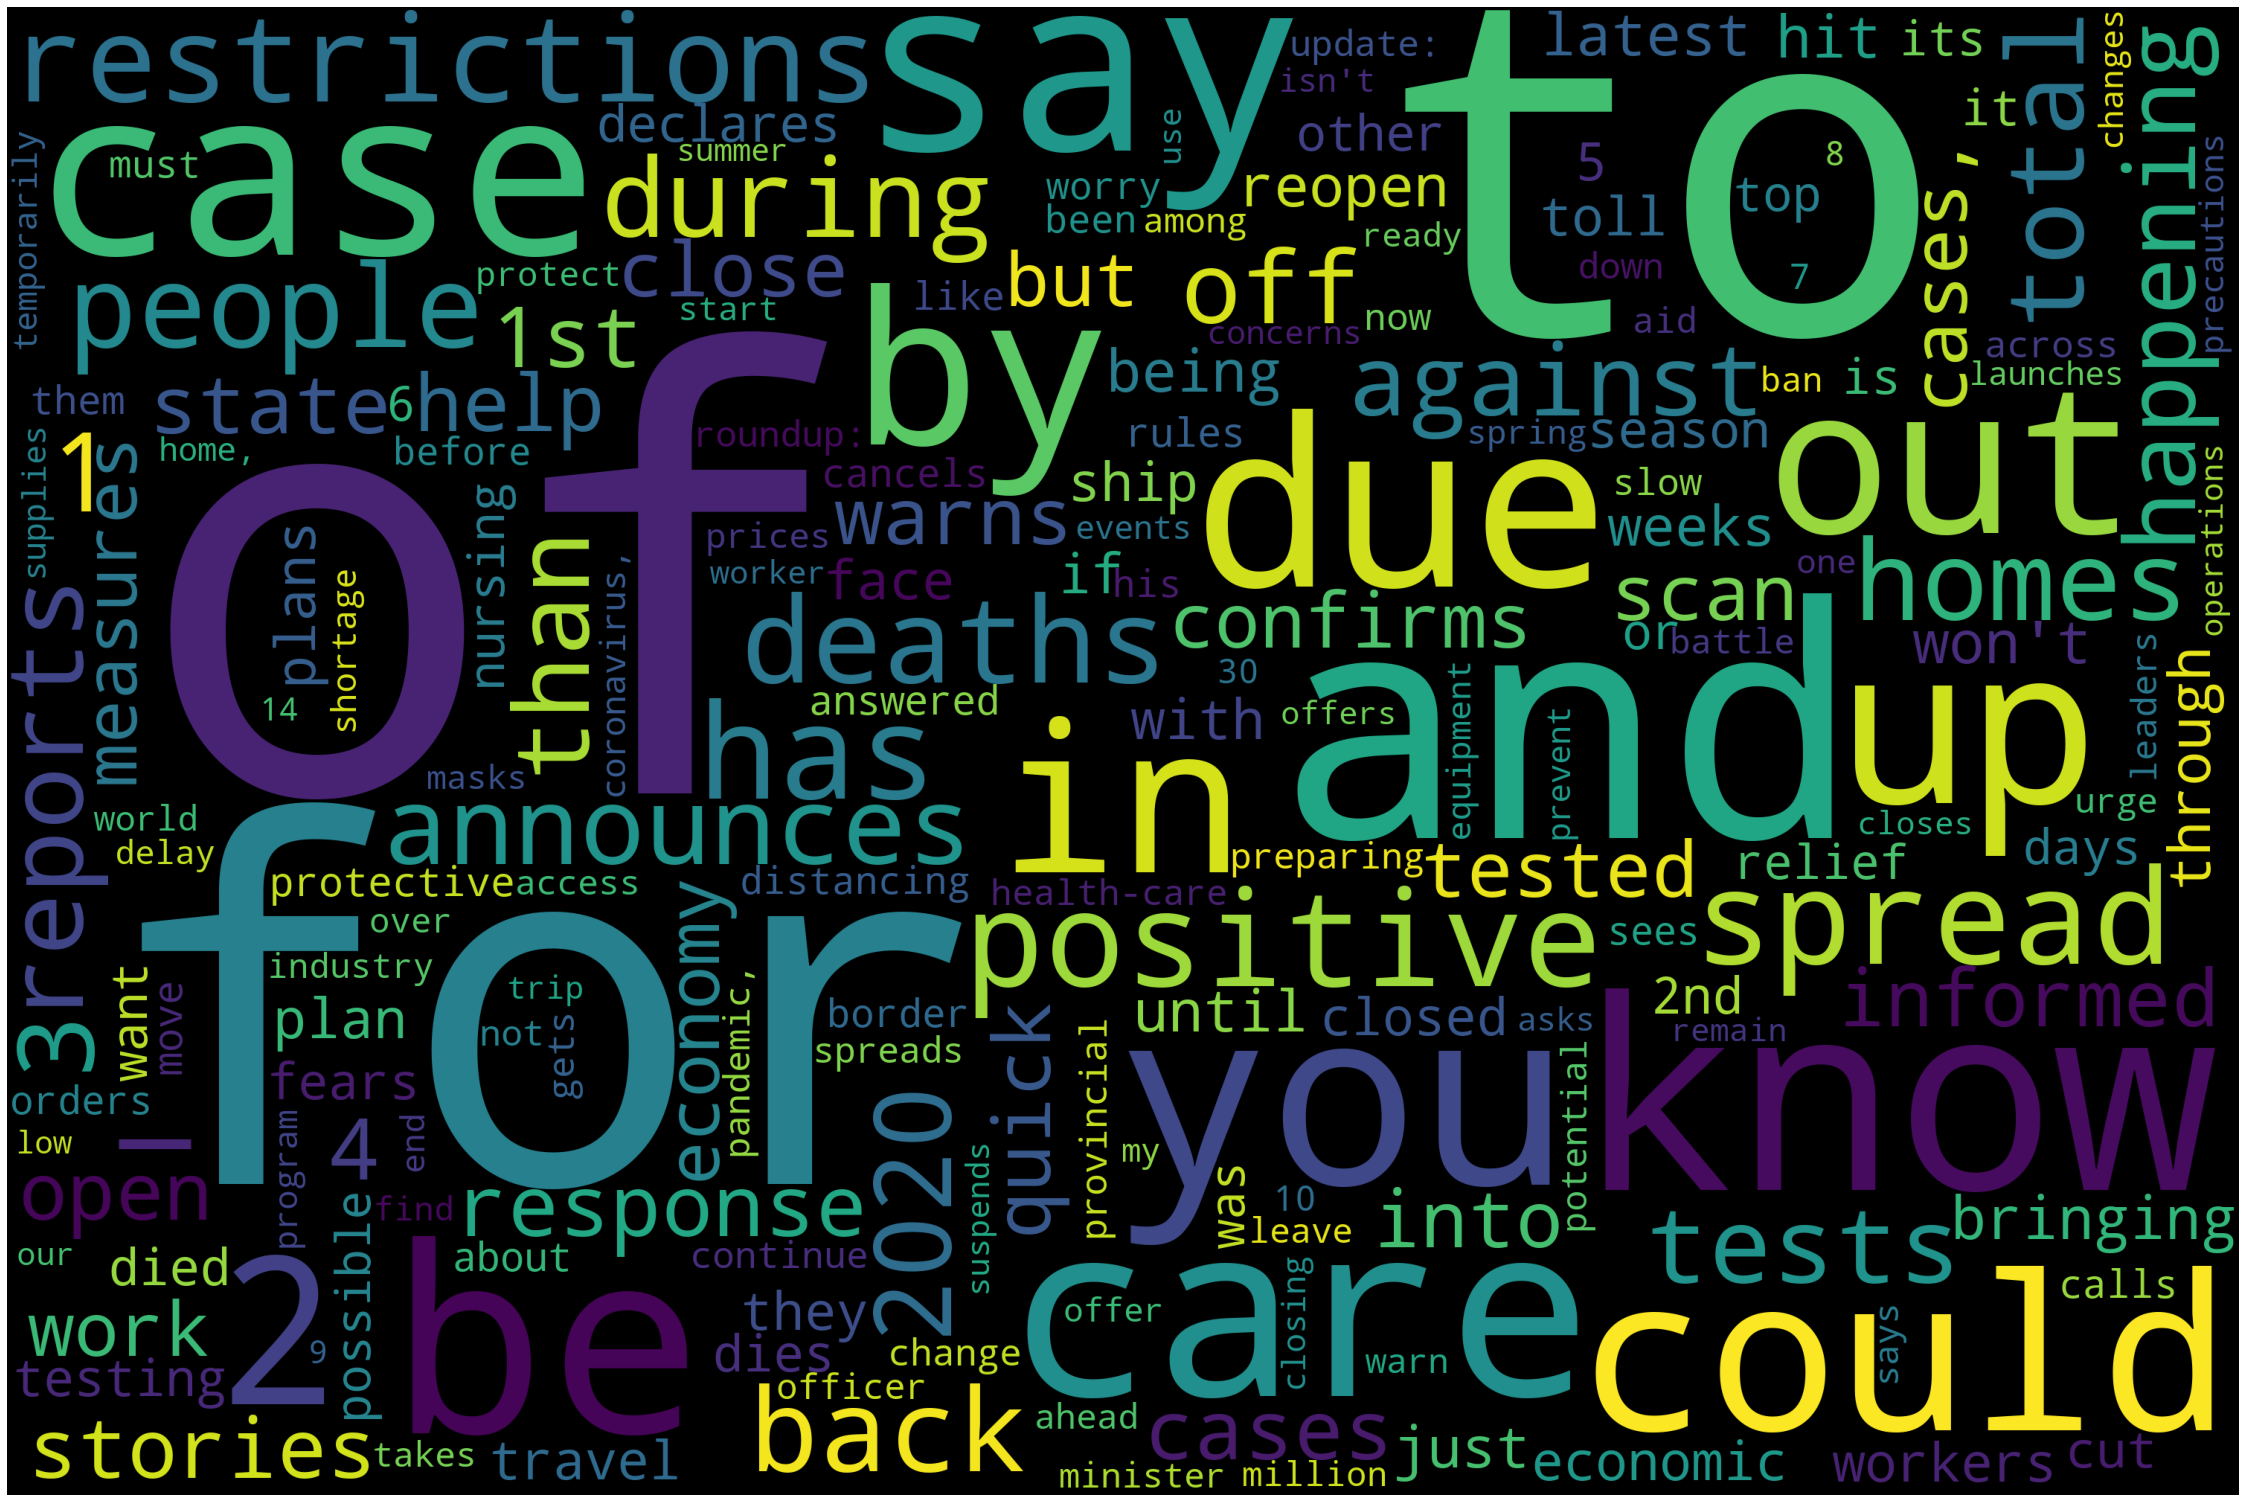

In [20]:
# This can take about a minute
# Retrieve the frequencies from the titles in the dataframe
frequencies = getFrequencyDictForText(' '.join(df["title"]))
# Create a word cloud based on the frequencies from the titles in the dataframe
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)

As you can see, we can easliy use the frequency of the terms from the titles to create a word cloud. These word clouds can be customized to be within image backgrounds, have custom colours, and more.    

The above word cloud contains some important terms, but many of the most frequent terms are not very important (or are symbols/numbers). These terms that appear very frequently in many different types of documents, but are not important, are called ***stopwords***. For example, the words *the*, *to*, *is*, *of*, ... are words that appear extremely frequently in text, but provide no meaningful information about the topic of a document. Often we want to remove these stopwords. For that reason, NLP libraries, such as spaCy, provide methods of detecting which words are stopwords. Below is an example of how spaCy can be used to determine if a word is a stopword (based on the sentence used in the first example from part 1).     

In [21]:
# Call our spaCy object to retrieve the results of running the sentence through the NLP Pipeline
# Note that we can reuse the sp variable without redefining it.
sentence_example_content = sp(sentence_example)
for token in sentence_example_content:
    print("Text: " + str(token.text) + " Is stopword: " + str(token.is_stop))

Text: Government Is stopword: False
Text: guidelines Is stopword: False
Text: in Is stopword: True
Text: Canada Is stopword: False
Text: recommend Is stopword: False
Text: that Is stopword: True
Text: people Is stopword: False
Text: stay Is stopword: False
Text: at Is stopword: True
Text: least Is stopword: True
Text: two Is stopword: True
Text: metres Is stopword: False
Text: away Is stopword: False
Text: from Is stopword: True
Text: others Is stopword: True
Text: as Is stopword: True
Text: part Is stopword: True
Text: of Is stopword: True
Text: physical Is stopword: False
Text: distancing Is stopword: False
Text: measures Is stopword: False
Text: to Is stopword: True
Text: curb Is stopword: False
Text: the Is stopword: True
Text: spread Is stopword: False
Text: of Is stopword: True
Text: COVID-19 Is stopword: False
Text: . Is stopword: False


Thus, in the next few questions you will be exploring different ways of manipulating the title data before generating the frequencies to create the word clouds. This will result in different word clouds that allow us to view important terms from the text based on certain criteria.    

In the next few questions, be sure to recall the example from part 1 which exhibits how spaCy can be used to perform lemmatization and POS tagging and the example above which exhibits how spaCy can be used to perform stopword detection.

**(TO DO) Q6 - 2 marks**    
Make a word cloud based on the frequency of the content from the document titles, where the stopwords are removed (you must use spaCy to find the stopwords).     

*Ensure that you use random_state=1 when generating the word cloud.*

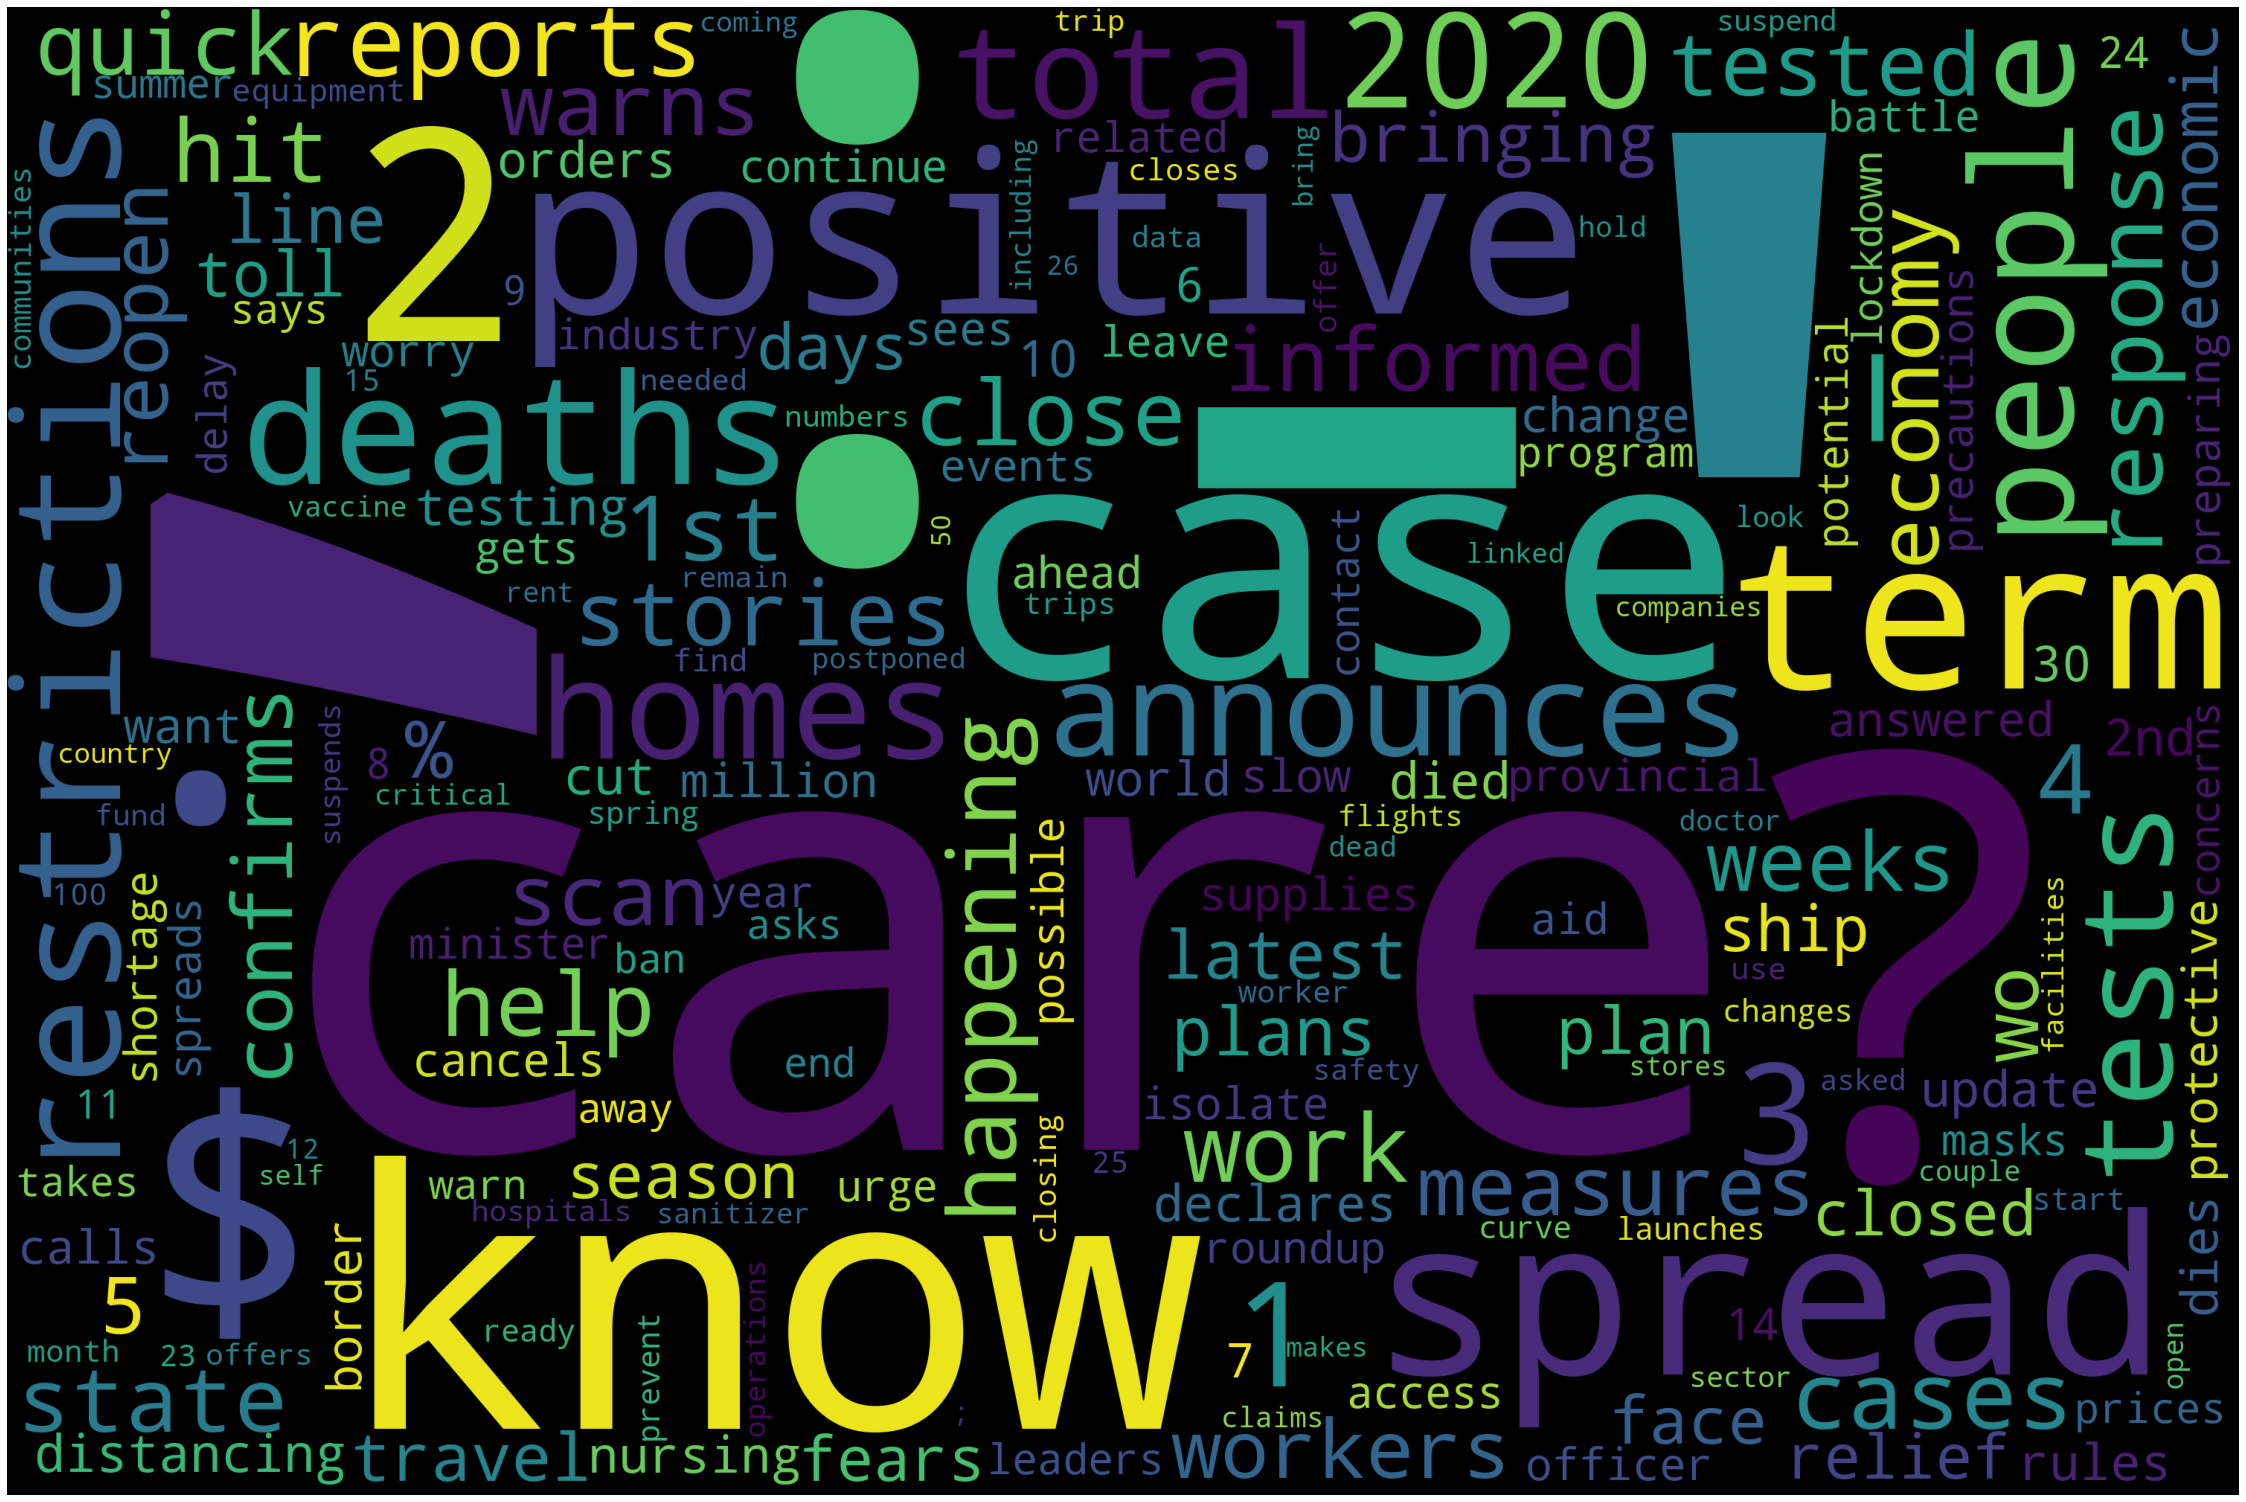

In [54]:
# ANSWER Q6 - 
# Get the titles and run them through spaCy
string = ''
for title in (df['title']):
    sentence = sp(title)
# Create a string of any token that is not a stopword
for title in (df['title']):
    sentence = sp(title)
    for token in sentence:
        if token.is_stop != True:
            string += str(token) + ' '

# Get the frequencies
frequencies = getFrequencyDictForText(string)
# Create the word cloud (with random_state=1)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)



**(TO DO) Q7 - 3 marks**    
a) (2 marks) Make a lemma cloud (a lemma is from the lemmatization of a token) based on the frequency of the content from the document titles with the stopwords removed, where the lemmas come from spaCy.    
b) (1 mark) Then, compare the resulting word cloud with the word cloud generated in Q6. What is the difference between the two?  Give some specific examples of differences.

*Ensure that you use random_state=1 when generating the word cloud.*

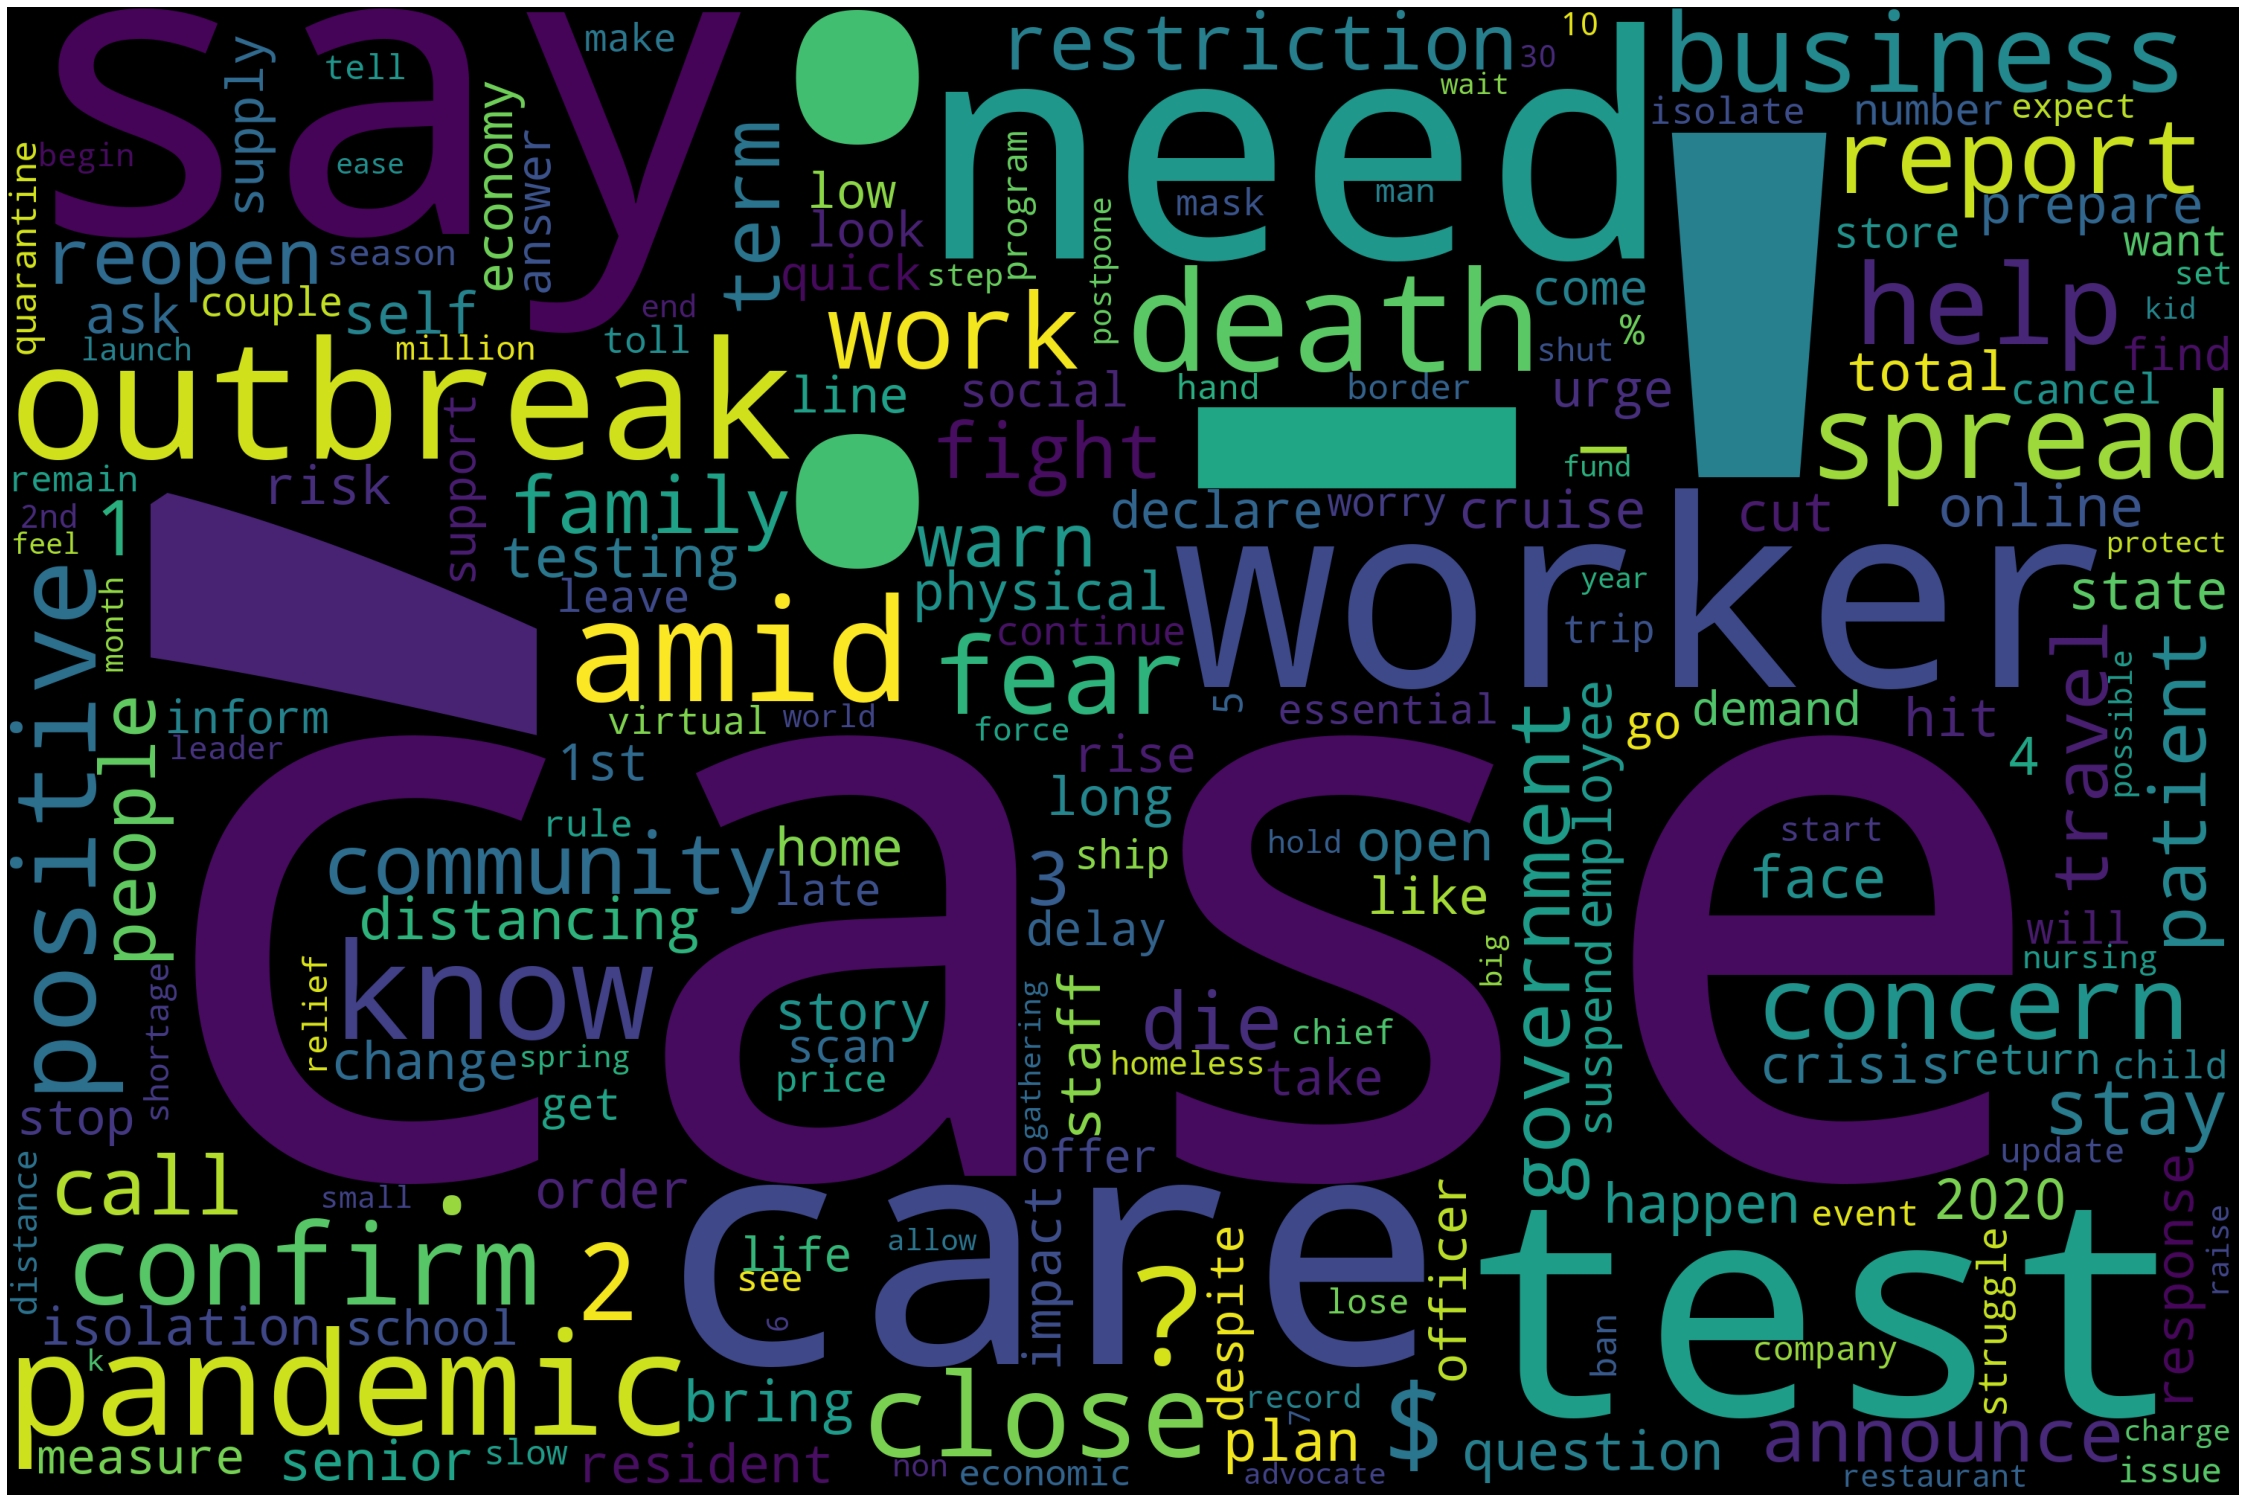

In [56]:
# ANSWER Q7 (a)
# Make a lemma cloud
string = ''
for title in (df['title']):
    sentence = sp(title)
    for token in sentence:
        if token.is_stop != True:
            string += str(token.lemma_) + ' '
            
frequencies = getFrequencyDictForText(string)
# Create the word cloud (with random_state=1)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)

**ANSWER Q7 (b) - 1 mark**    

There are many difference between two picture, first of all, the biggest word change from care to case. And percentage of number in picture two is smaller than the percentage of number in picture one.



**(TO DO) Q8 - 3 marks**    
Build a word cloud based with the content of the titles of the documents where only the *Adjectives* are used AND where all of the stopwords are removed AND where the lemmas are added (rather than the text).    

*Ensure that you use random_state=1 when generating the word cloud.*

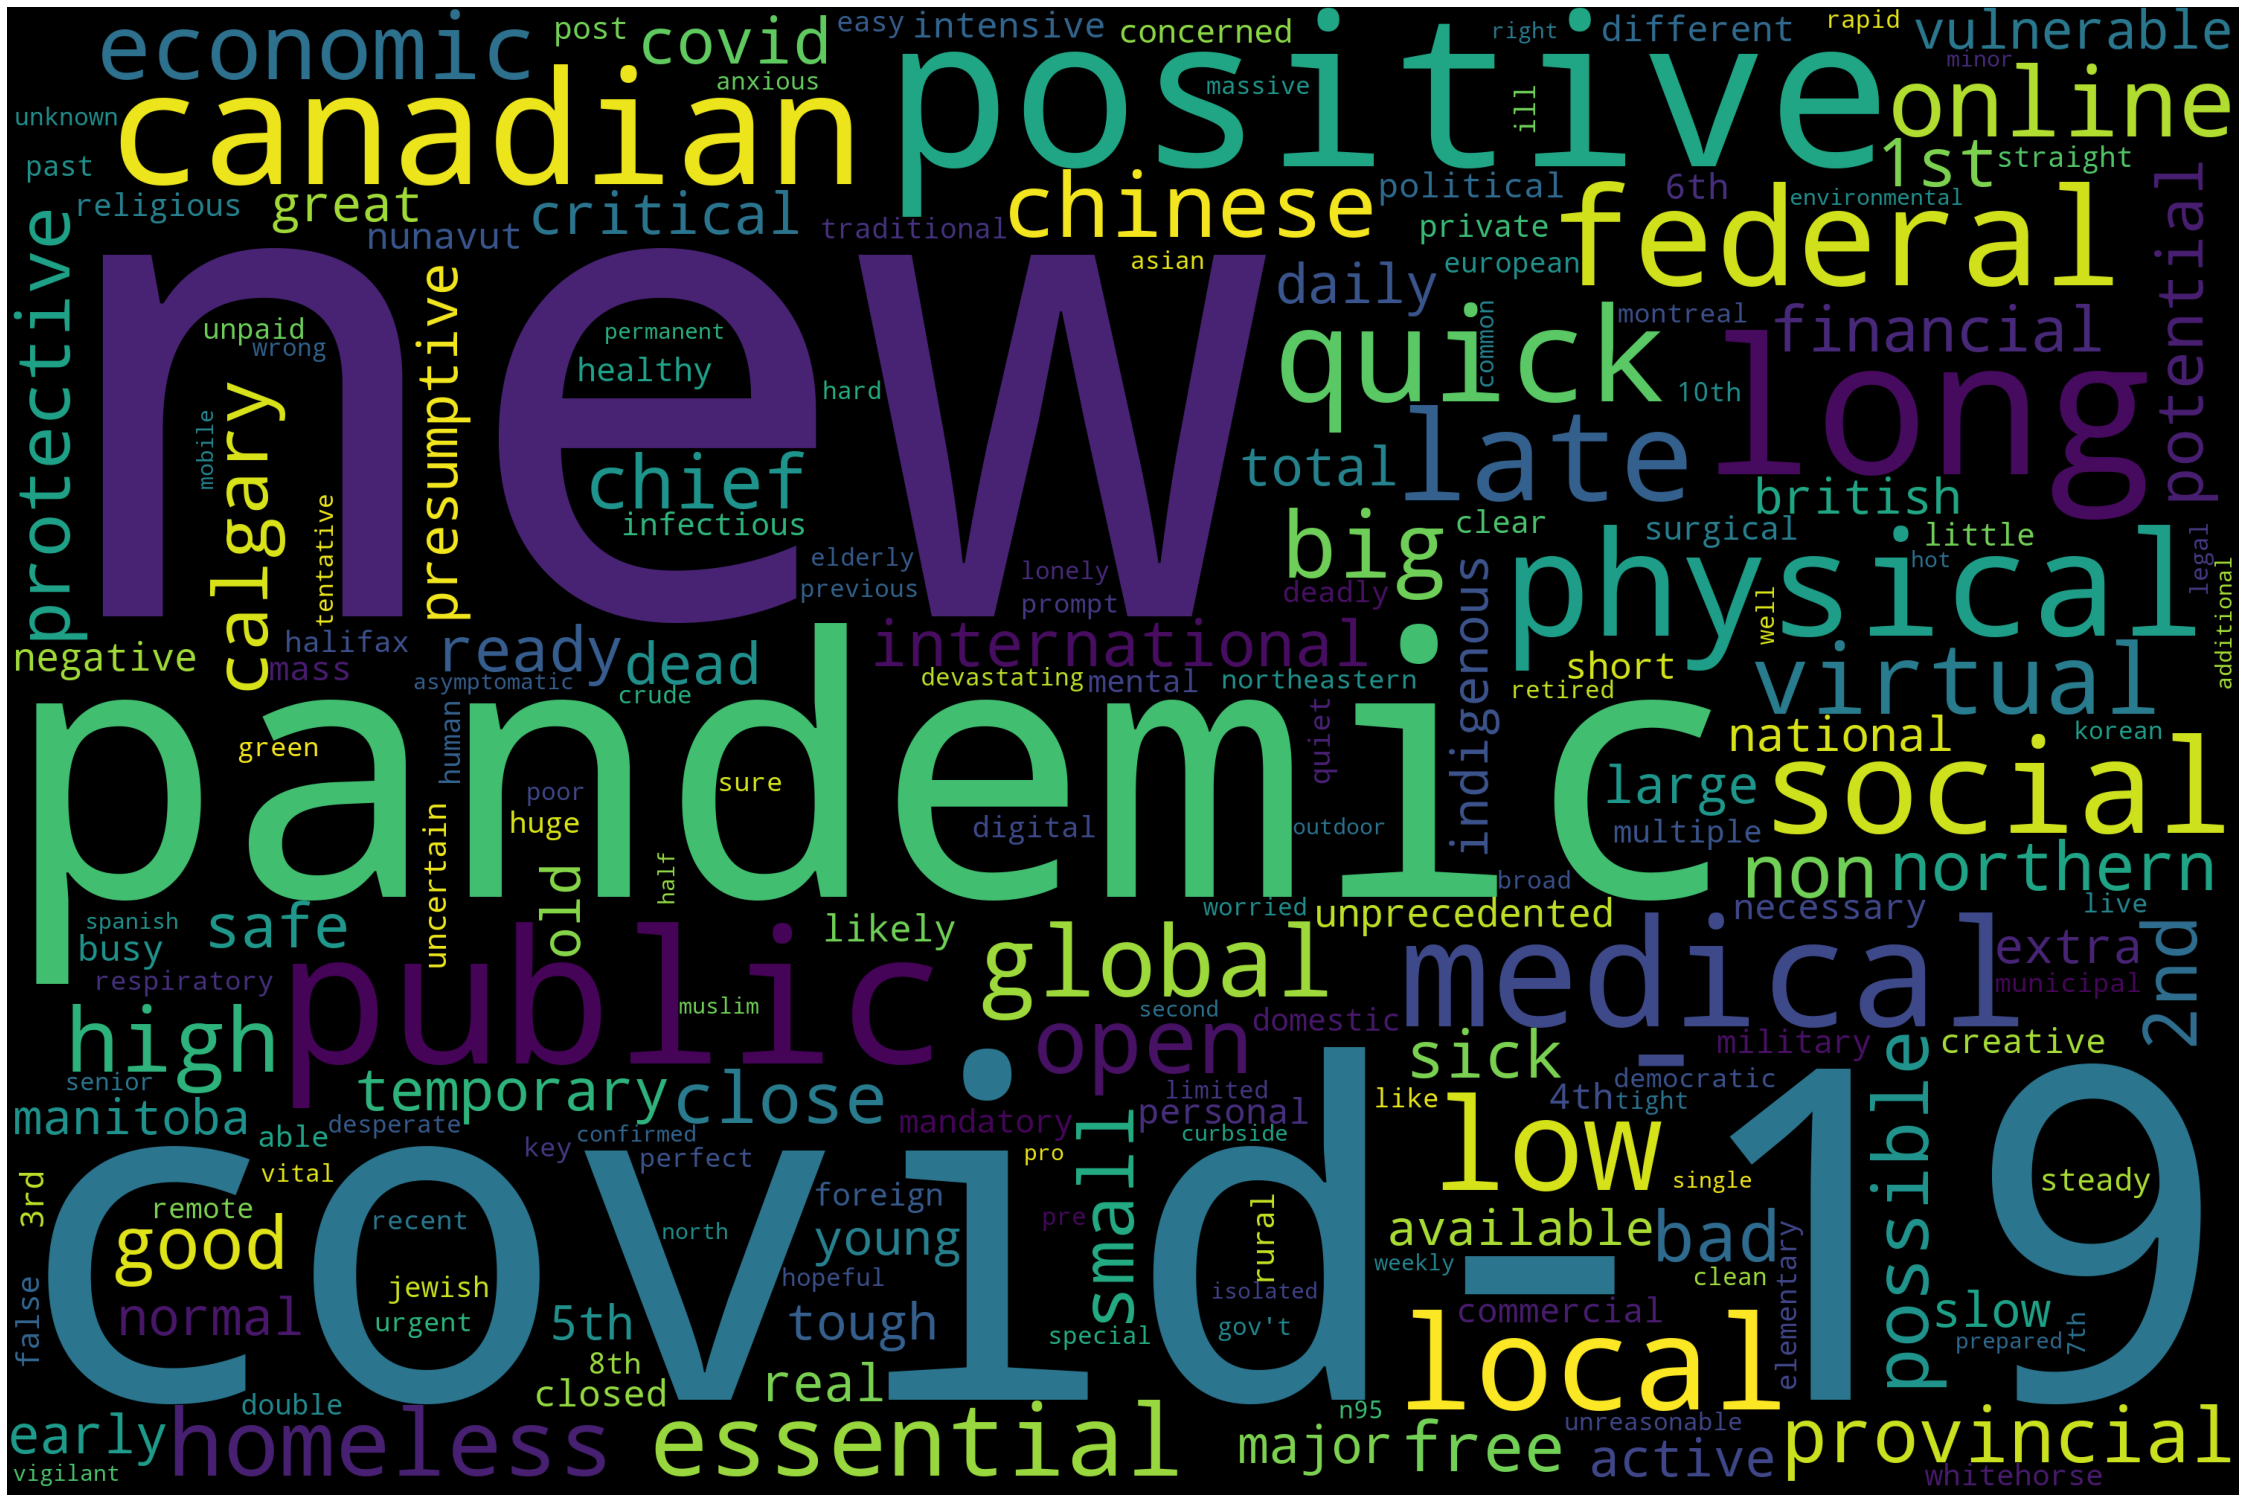

In [57]:
# ANSWER Q8 
# Word cloud with stopwords removed, only using the lemmas of the adjectives
string = ''
for title in (df['title']):
    sentence = sp(title)
    for token in sentence:
        if token.is_stop != True:
            if token.pos_ == 'ADJ':
                string += str(token.lemma_) + ' '
frequencies = getFrequencyDictForText(string)
# Create the word cloud (with random_state=1)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)

**(TO DO) Q9 - 2 marks**    
Based on your own choice, build a word cloud based with the content of the titles of the documents where only the *Verbs* or the *Nouns* are used (you select one of these to work with) AND where all of the stopwords are removed AND where the lemmas are added (rather than the text).    

*Ensure that you use random_state=1 when generating the word cloud.*

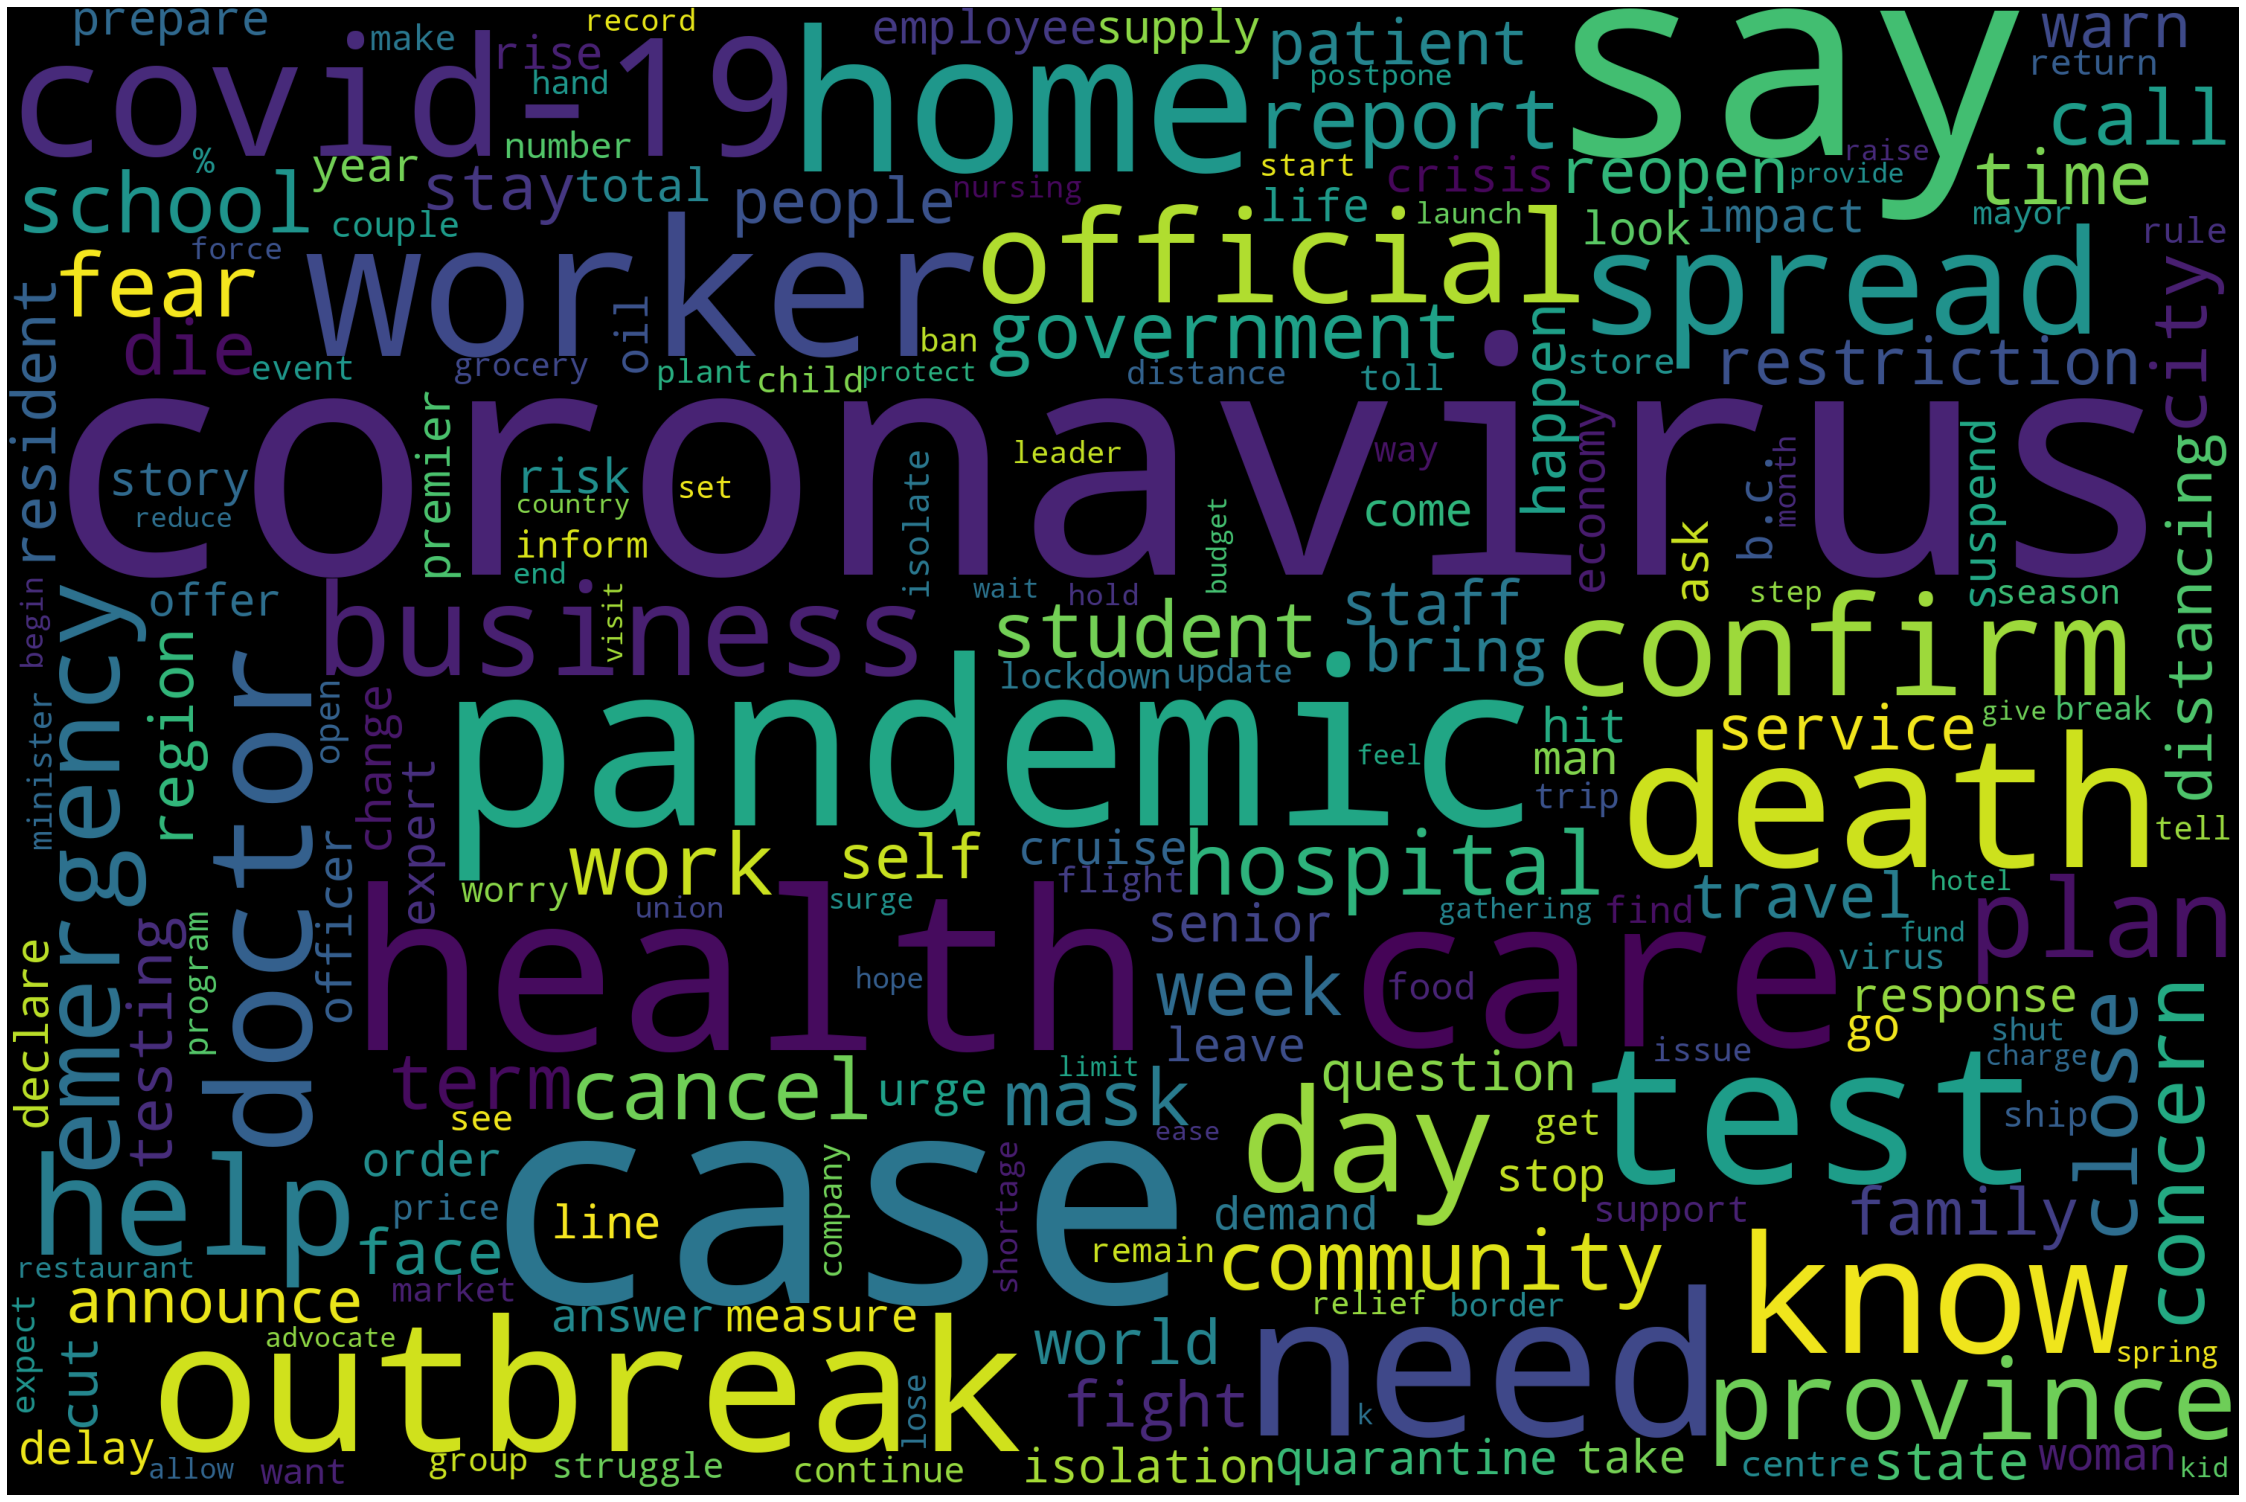

In [58]:
# ANSWER Q9 
# Word cloud with either nouns or verbs only, stopwords removed, and lemmas used
string = ''
for title in (df['title']):
    sentence = sp(title)
    for token in sentence:
        if token.is_stop != True:
            if token.pos_ == 'NOUN' or token.pos_ == 'VERB':
                string += str(token.lemma_) + ' '
frequencies = getFrequencyDictForText(string)
# Create the word cloud (with random_state=1)
word_cloud = WordCloud(width=3000, height=2000, random_state=1, collocations=False).generate_from_frequencies(frequencies)
# Plot the word cloud
plot_cloud(word_cloud)


Now that all of the word clouds have been created, you will compare them to analyze how the NLP techniques that have been performed impacted the generated word clouds.

**(TO DO) Q10 - 2 marks** 

Out of the word clouds that you have created, which word cloud do you believe provided the most relevant terms related to Covid-19 and why? Give some example of terms that you think are relevant. Give examples of terms that you think are not relevant.

**ANSWER Q10**

The word cloud with either nouns or verbs only are the most relevant terms related to Covid-19. Because the most frequency word form this cloud are coronavirus,case, pandemic an so on. Compare with other word cloud, are only some word mention about Covid-19 but they can not describe Covid-19. So, last word cloud is the best.

***SIGNATURE:***
My name is Tan Chen.
My student number is 300072995.
I certify being the author of this assignment.